In [1]:
## Importing the essential libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset

dataset = pd.read_csv('Position_Salaries.csv')
print(dataset.info())
print('=' * 80)
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
X.shape, y.shape

((10, 1), (10,))

In [4]:
## Fitting Decision Tree Regression to the dataset

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [5]:
## Predict a new result

y_pred = regressor.predict([[6.5]])
y_pred

array([160333.33333333])

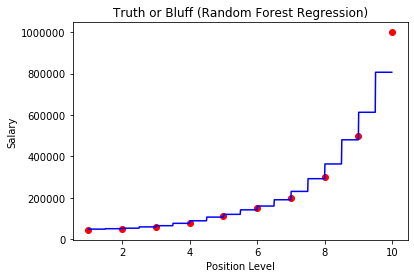

In [7]:
## Visualising the Random Forest Regression results

# For higher resolution and smoother curve
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()